# Monte Carlo simulation applied to finances

In this project we apply Monte Carlo method to simulate the evolution of stock price given a list containing historical data to be used as reference and an initial value.

We consider here that the week form of market efficiency is true, i.e., past price movements, volume, and earnings data do not affect a stock’s price and can’t be used to predict its future direction. Therefore, the stock price can be though as following a geometric brownian motion.

The price differential (dS) can be writen as function of the time diferential (dt) as: $$ \frac{dS}{S} = \mu dt + \sigma\epsilon\sqrt{dt} $$

where $\mu$ is the mean return, $\sigma$ its standard deviation and $\epsilon$ a random normally distributed number with mean 0 and std 1.

It can be shown that this leads the stock to be described by the following equation:

$$S(t)=S(0) \exp{(at+\sigma\epsilon \sqrt{t})}$$

where a is called drift an can be evaluated by: $a=\mu-\sigma^2 /2$.

More details about the theory behind the model can be found [here](https://medium.com/@polanitzer/forward-looking-monte-carlo-simulation-predict-the-future-value-of-equity-using-the-lognormal-f54320f9c230).

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

Start date: 2018-11-23 00:00:00 End date: 2023-11-22 00:00:00


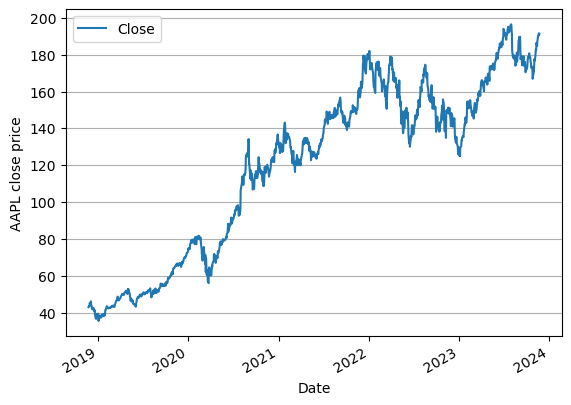

In [2]:
# Read data

stockData=pd.read_csv('AAPL.csv',index_col=0,usecols=['Date','Close'],parse_dates=True)
stockData.plot()
plt.ylabel('AAPL close price')
plt.xlabel('Date')
plt.grid(axis='y')
plt.savefig('AAPL_stock.png')

print('Start date:',stockData.index[0],'End date:',stockData.index[-1])


In [3]:
# Check for NaN values
stockData.isna().sum()

Close    0
dtype: int64

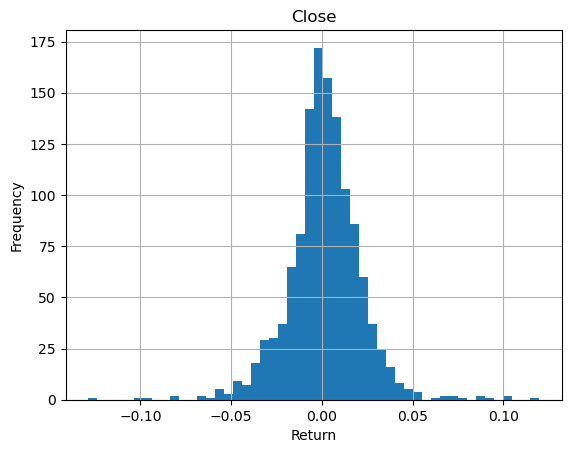

In [4]:
# Calculate daily returns (relative variation of price per day)

returns=stockData.pct_change()

# Plot histogram
returns.hist(bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.savefig('returns_hist.png')

In [5]:
# Calculate the mean and standard deviation of returns

meanReturns=returns.Close.mean()
stdReturns=returns.Close.std()
varReturns=returns.Close.var()

print('Mean: {}% /day \nStd: {}% /sqrt(day)'.format(100*meanReturns,100*stdReturns))

Mean: 0.13991427867694464% /day 
Std: 2.060774208050013% /sqrt(day)


In [6]:
# Calculate drift ratio per day

drift=meanReturns - 0.5*varReturns
drift

0.0011868032699412386

In [7]:
# Perform MC simulation

# Number of simulations
mc_sims=100_000

# Period in days
T=252

# Present stock
S0=stockData.Close.iloc[-1]
print('Present stock:',S0)

# Initializes stock matrix
S=np.full(shape=(mc_sims,T+1),fill_value=S0)

# Generate matrix with normally distributed elements
Z=np.random.normal(size=(mc_sims,T))

# MC loop
for t in range(T):
    volatility=stdReturns*Z[:,t]
    S[:,t+1]=S[:,t]*np.exp( drift + volatility )

Present stock: 191.309998


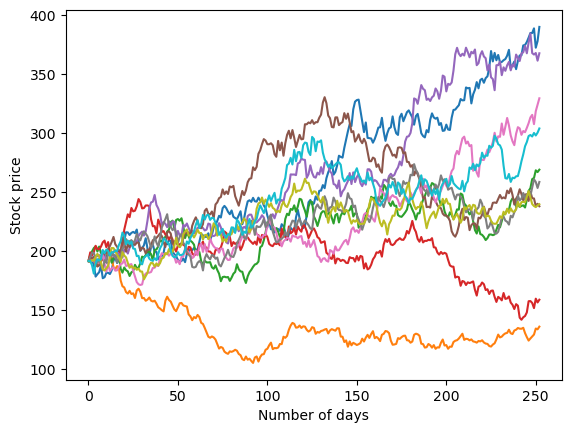

In [8]:
# Plot the 10 first MC simulations

days=range(T+1)
for i in range(10):
    plt.plot(days, S[i,:])
plt.xlabel('Number of days')
plt.ylabel('Stock price')
plt.savefig('10paths.png')

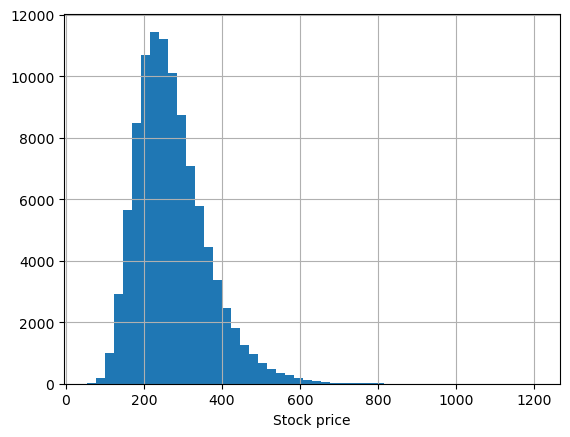

In [9]:
# Plot histogram of final stock prices
Sf=S[:,-1]
plt.hist(Sf,bins=50)
plt.xlabel('Stock price')
plt.grid()
plt.savefig('results_hist.png')

In [10]:
# Result statistics

# Equity in a deterministic world: S(T)=S0*exp(mean*T)
Sdeterm=S0*np.exp(avgReturns*T)

meanSf=Sf.mean()
stdSf=Sf.std()
print('Equity in deterministic world after {} days: {} \nAverage equity after {} days: {} \nStandard deviation: {}'.format(round(T), 
                                                                                                                 round(Sdeterm,2), 
                                                                                                                 round(T), 
                                                                                                                 round(meanSf,2), 
                                                                                                                 round(stdSf,2)) )

NameError: name 'avgReturns' is not defined